In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

#Load dataset using Pandas
data=pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
# Remove rows with missing values
data.dropna(inplace=True)

In [12]:
# Check for null values again after cleanup
print("Null values after cleanup:")
print(data.isnull().sum())

Null values after cleanup:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [13]:
#show number of rolls and detail of dataframe
data.info

<bound method DataFrame.info of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067

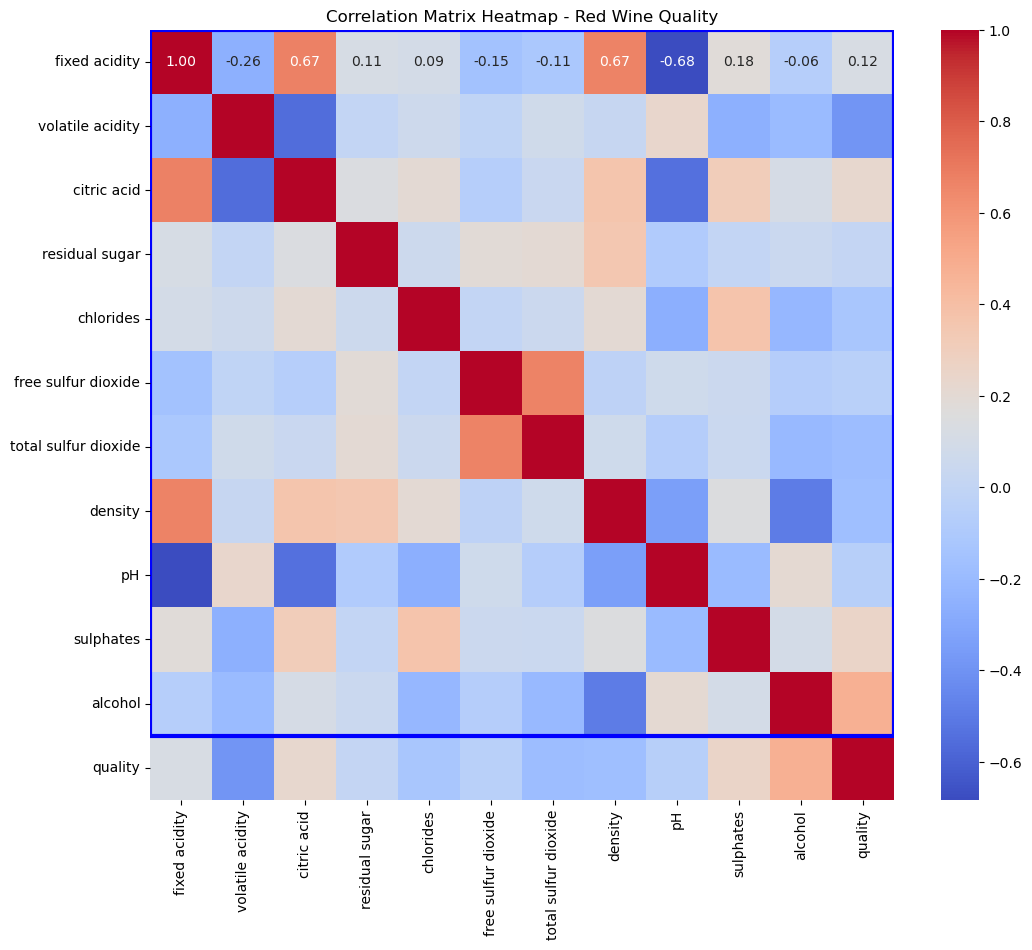

In [14]:
# Compute the correlation matrix - Developer PMA
# Calculate correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Matrix Heatmap - Red Wine Quality')

# Highlight correlations with 'Potability'
highlight = correlation_matrix['quality'].sort_values(ascending=False)
highlight = highlight.drop('quality')  # Remove self-correlation
highlight_cols = highlight.index.tolist()
heatmap.add_patch(plt.Rectangle((0, 0), len(correlation_matrix), len(highlight_cols), fill=False, edgecolor='blue', lw=3))

# Show plot
plt.show()

In [15]:
# Separate features and target variable
X = data.drop('quality', axis=1)
y = data['quality']

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)


In [78]:
# Normalize or scale the features if necessary
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [79]:
# Initialize and fit the Random Forest model
rf_model = RandomForestClassifier(random_state=50)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=50)

In [80]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importance (Random Forest):")
print(importance_df)


Feature Importance (Random Forest):
                 Feature  Importance
10               alcohol    0.150342
9              sulphates    0.108571
1       volatile acidity    0.103699
6   total sulfur dioxide    0.102103
7                density    0.093315
4              chlorides    0.081399
0          fixed acidity    0.079157
8                     pH    0.074902
2            citric acid    0.074011
3         residual sugar    0.068778
5    free sulfur dioxide    0.063722


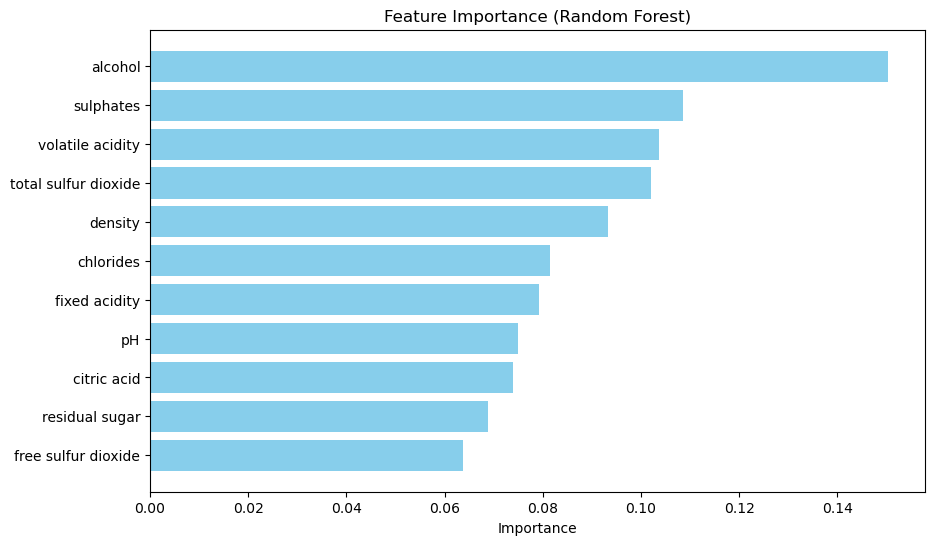

In [81]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()  # Invert y-axis to display features with the most important at the top
plt.show()

In [84]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.740625


# Optimisation - Defining a threshold of wine quality 

In [32]:
X = data.drop(['free sulfur dioxide', 'residual sugar', 'quality'], axis=1)
y = data['quality']

In [33]:
# Convert quality into categories (assuming good: 6-8, bad: below 6)
threshold = 6
y_binary = (y >= threshold).astype(int)  # 1 for good, 0 for bad

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7500


# Optimisation - Dimension Deduction Leena

# PCA & Explained Variance Ratio by Principal Component

In [85]:
# Initialize StandardScaler and fit-transform the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize PCA and fit-transform the scaled features
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame to display explained variance ratio
pca_df = pd.DataFrame({'PC': range(1, len(explained_variance_ratio)+1), 'Explained Variance Ratio': explained_variance_ratio})

# Display explained variance ratio
print("\nExplained Variance Ratio (PCA):")
print(pca_df)



Explained Variance Ratio (PCA):
    PC  Explained Variance Ratio
0    1                  0.281739
1    2                  0.175083
2    3                  0.140958
3    4                  0.110294
4    5                  0.087208
5    6                  0.059964
6    7                  0.053072
7    8                  0.038451
8    9                  0.031331
9   10                  0.016485
10  11                  0.005414


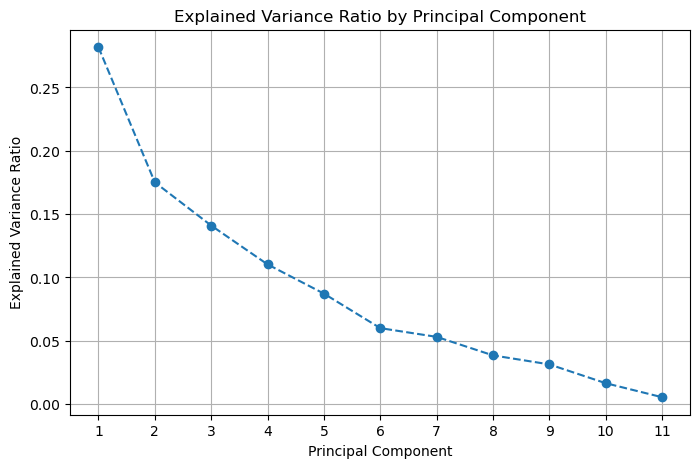

In [86]:
# Plot explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(explained_variance_ratio)+1))
plt.grid(True)
plt.show()

In [87]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.740625
